In [24]:
from pandas import read_csv
import numpy as np

In [4]:
df = read_csv('international-airline-passengers.csv',usecols=[1])

In [99]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [8]:
values = df.values
values.shape

(144, 1)

In [11]:
train_size = int((values.shape[0]*0.67))
test_size = values.shape[0]-train_size
train_size,test_size

(96, 48)

In [51]:
train_data = values[0:train_size]
test_data = values[train_size:]

In [52]:
train_data.shape,test_data.shape

((96, 1), (48, 1))

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

/home/tanishqsaluja/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
train_data.shape,test_data.shape

((96, 1), (48, 1))

In [55]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        x = data[i:i+k,0]
        dataX.append(x)
        y = data[i+k,0]
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [56]:
type(test_data)

numpy.ndarray

In [57]:
look_back = 12
trainX, trainY = create_dataset(train_data,look_back)
testX, testY = create_dataset(test_data,look_back)

In [58]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [87]:
# By default the activation function used in RNN is tanh
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1))) # input_shape is (look_back,num_of_features)
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 7ms/step - loss: 0.2372
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0204
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 10/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 11/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 12/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 13/100
84/84 [=================

In [89]:
trainX.shape

(84, 12, 1)

In [90]:
# The shape of training data is [#Number of training data points,Length of time frame,#Number of features in each time frame] 

In [91]:
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [98]:
trainX.shape # Correct data format for model.fit()

(84, 12, 1)

In [93]:
trainY.shape

(84,)

In [94]:
test_predict = model.predict(testX)
test_predict = scaler.inverse_transform(test_predict).ravel()

train_predict = model.predict(trainX)
train_predict = scaler.inverse_transform(train_predict).ravel()

train_true = scaler.inverse_transform([trainY]).ravel()
test_true = scaler.inverse_transform([testY]).ravel()

test_predict.shape,test_true.shape

((36,), (36,))

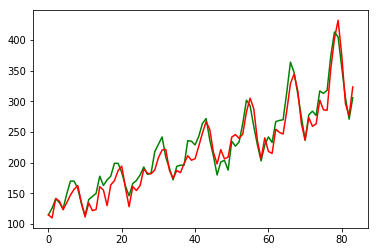

In [95]:
import matplotlib.pyplot as plt
plt.plot(train_true,c='g')
plt.plot(train_predict,c='r')

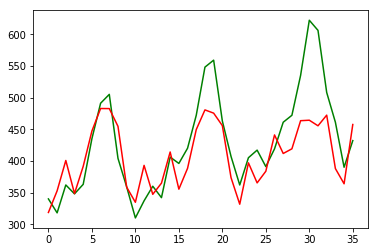

In [96]:
plt.plot(test_true,c='g')
plt.plot(test_predict,c='r')

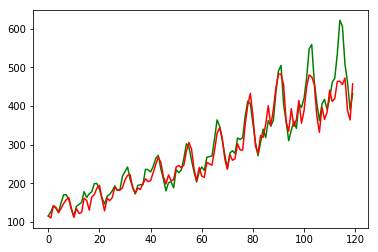

In [97]:
combinedPredicted = np.concatenate((train_true,test_true))
plt.plot(combinedPredicted,c='g')
combinedTrue = np.concatenate((train_predict,test_predict))
plt.plot(combinedTrue,c='r')